<a href="https://www.kaggle.com/code/swastishankhdhar/ipl-analysis?scriptVersionId=253870809" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
d=pd.read_csv("/kaggle/input/ipl-match-upto2017/matches - matches.csv")
d.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [4]:
d['city']=='Hyderabad'

0       True
1      False
2      False
3      False
4      False
       ...  
631    False
632    False
633    False
634    False
635    False
Name: city, Length: 636, dtype: bool

# Fetching series vs MASKING (fetching series based on the conditions)


In [5]:
#fetching series
f=d.iloc[3:100,1:]
f


,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
96,2008,Chandigarh,2008-05-28,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,41,0,SE Marsh,"Punjab Cricket Association Stadium, Mohali",SJ Davis,K Hariharan,NaN
97,2008,Delhi,2008-05-15,Delhi Daredevils,Deccan Chargers,Deccan Chargers,field,normal,0,Delhi Daredevils,12,0,A Mishra,Feroz Shah Kotla,BG Jerling,GA Pratapkumar,NaN
98,2008,Mumbai,2008-05-16,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,SM Pollock,Wankhede Stadium,BR Doctrove,DJ Harper,NaN


In [6]:
#masking
mask=(d['city']=='Hyderabad')
type(mask)
#mask contsins all the T/F type values--- now using it in the indexing with the dataset varible 
#like data[mask]--> we will get the required rows and column based on the condition 

#d[mask].shape

pandas.core.series.Series

In [7]:
d[mask][1:12]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
18,19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN
35,36,2017,Hyderabad,2017-04-30,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,48,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,S Ravi,NaN
42,43,2017,Hyderabad,2017-05-06,Rising Pune Supergiant,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Rising Pune Supergiant,12,0,JD Unadkat,"Rajiv Gandhi International Stadium, Uppal",KN Ananthapadmanabhan,AK Chaudhary,NaN
46,47,2017,Hyderabad,2017-05-08,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,normal,0,Sunrisers Hyderabad,0,7,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",KN Ananthapadmanabhan,M Erasmus,NaN
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN
65,66,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN
67,68,2008,Hyderabad,2008-04-24,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN
76,77,2008,Hyderabad,2008-05-01,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",BR Doctrove,RB Tiffin,NaN


In [8]:
d[mask].shape
d[mask].shape[0]

49

## Creating user friendly function for masking 

In [11]:
def get_city(c):
    m1=d['city']==c
    return d[m1].shape

In [12]:
c=input("enter city")
get_city(c)

enter city Hyderabad


(49, 18)

# Working on categorial data - 
## it is difficult to count how many times any team won, hence we use python one statement to get all the count of winnings for each team 

In [13]:
d['winner'].value_counts()

winner
Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: count, dtype: int64

In [14]:
# To get the count of wins of particular team
ct=d['winner']=='Mumbai Indians'
d[ct].shape[0]

92

# PLOTTING the Functions

In [15]:
import matplotlib.pyplot as plt

<Axes: ylabel='winner'>

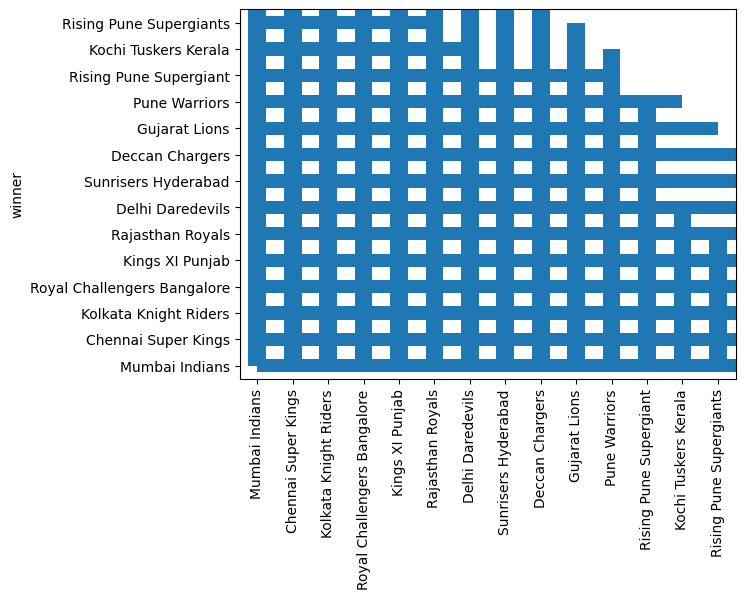

In [16]:
d['winner'].value_counts().plot(kind='bar')
d['winner'].value_counts().plot(kind='barh')

<Axes: ylabel='winner'>

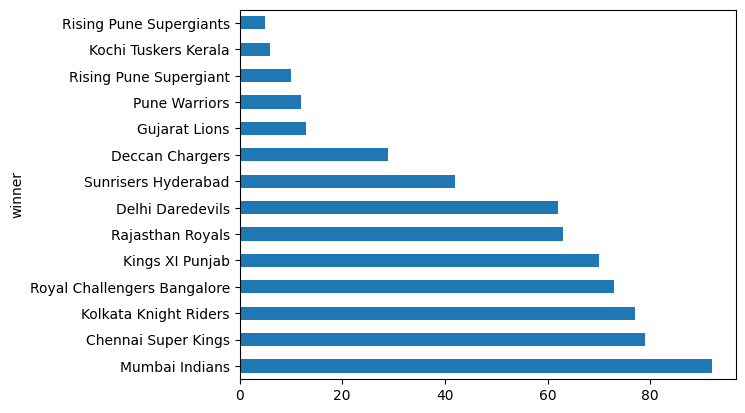

In [17]:
d['winner'].value_counts().plot(kind='barh')

<Axes: ylabel='count'>

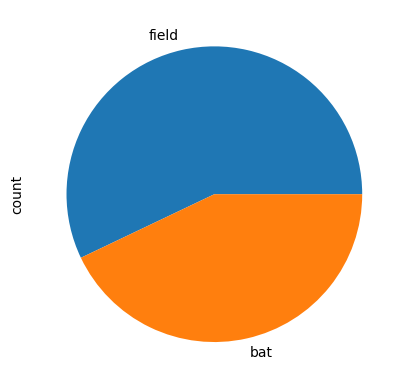

In [18]:
#PIE chart
d['toss_decision'].value_counts().plot(kind='pie')

<Axes: ylabel='Frequency'>

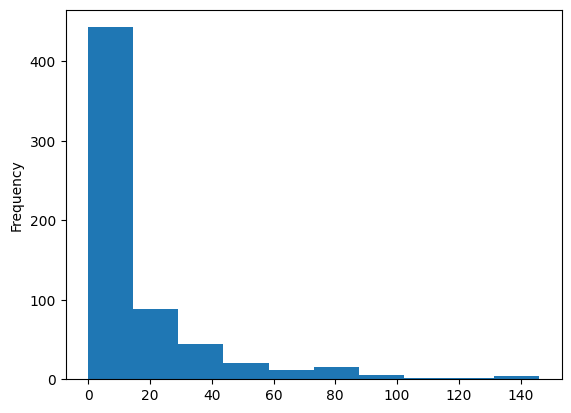

In [19]:
d['win_by_runs'].plot(kind='hist')

<Axes: ylabel='win_by_runs'>

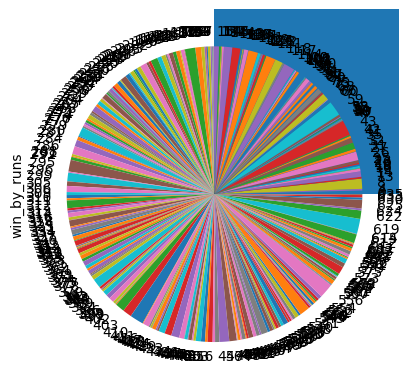

In [20]:
# Histogram
d['win_by_runs'].plot(kind='hist')
d['win_by_runs'].plot(kind='pie')